In [4]:
from numpy import *
from scipy import *
import numpy as np
import scipy as sci
from numpy import fft
from scipy import fftpack
from numpy.linalg import inv
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Solve a PDE with the Fourier Sine series
$
u\left( z, t \right) = \sum_{l} 
\hat{u}_l \left( t \right) ~C_l(z),
$ where $C_l(y)$ is the Fourier Sine Transform. 



Test FFT conventions

there [  0.00000000e+00   2.01298520e-01   3.94355855e-01   5.71268215e-01
   7.24792787e-01   8.48644257e-01   9.37752132e-01   9.88468324e-01
   9.98716507e-01   9.68077119e-01   8.97804540e-01   7.90775737e-01
   6.51372483e-01   4.85301963e-01   2.99363123e-01   1.01168322e-01
  -1.01168322e-01  -2.99363123e-01  -4.85301963e-01  -6.51372483e-01
  -7.90775737e-01  -8.97804540e-01  -9.68077119e-01  -9.98716507e-01
  -9.88468324e-01  -9.37752132e-01  -8.48644257e-01  -7.24792787e-01
  -5.71268215e-01  -3.94355855e-01  -2.01298520e-01  -2.90946462e-15]
and back again [  0.00000000e+00   2.01298520e-01   3.94355855e-01   5.71268215e-01
   7.24792787e-01   8.48644257e-01   9.37752132e-01   9.88468324e-01
   9.98716507e-01   9.68077119e-01   8.97804540e-01   7.90775737e-01
   6.51372483e-01   4.85301963e-01   2.99363123e-01   1.01168322e-01
  -1.01168322e-01  -2.99363123e-01  -4.85301963e-01  -6.51372483e-01
  -7.90775737e-01  -8.97804540e-01  -9.68077119e-01  -9.98716507e-01
  -9.8846832

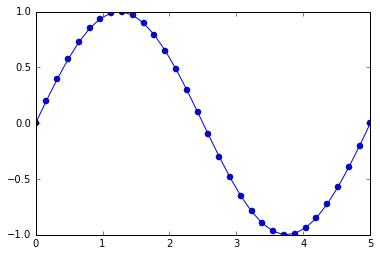

second derive 32 [ 0.         -0.31787788 -0.62274181 -0.90211061 -1.14454689 -1.3401253
 -1.48083881 -1.56092661 -1.57710989 -1.52872611 -1.4177561  -1.24874299
 -1.0286062  -0.76635814 -0.4727353  -0.15975861  0.15975861  0.4727353
  0.76635814  1.0286062   1.24874299  1.4177561   1.52872611  1.57710989
  1.56092661  1.48083881  1.3401253   1.14454689  0.90211061  0.62274181
  0.31787788  0.        ]
second drive exact 32 [ -0.00000000e+00  -3.17877882e-01  -6.22741805e-01  -9.02110606e-01
  -1.14454689e+00  -1.34012530e+00  -1.48083881e+00  -1.56092661e+00
  -1.57710989e+00  -1.52872611e+00  -1.41775610e+00  -1.24874299e+00
  -1.02860620e+00  -7.66358142e-01  -4.72735295e-01  -1.59758611e-01
   1.59758611e-01   4.72735295e-01   7.66358142e-01   1.02860620e+00
   1.24874299e+00   1.41775610e+00   1.52872611e+00   1.57710989e+00
   1.56092661e+00   1.48083881e+00   1.34012530e+00   1.14454689e+00
   9.02110606e-01   6.22741805e-01   3.17877882e-01   4.59444237e-15]


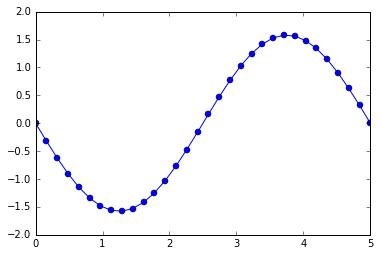

first derive 32 [ 1.25663706  1.23091363  1.15479644  1.03140176  0.86578136  0.66471578
  0.43643665  0.19028976 -0.06364762 -0.31497926 -0.55341561 -0.76919506
 -0.95348358 -1.09873636 -1.19900675 -1.25018966 -1.25018966 -1.19900675
 -1.09873636 -0.95348358 -0.76919506 -0.55341561 -0.31497926 -0.06364762
  0.19028976  0.43643665  0.66471578  0.86578136  1.03140176  1.15479644
  1.23091363  1.25663706]
first drive exact 32 [ 1.25663706  1.23091363  1.15479644  1.03140176  0.86578136  0.66471578
  0.43643665  0.19028976 -0.06364762 -0.31497926 -0.55341561 -0.76919506
 -0.95348358 -1.09873636 -1.19900675 -1.25018966 -1.25018966 -1.19900675
 -1.09873636 -0.95348358 -0.76919506 -0.55341561 -0.31497926 -0.06364762
  0.19028976  0.43643665  0.66471578  0.86578136  1.03140176  1.15479644
  1.23091363  1.25663706]


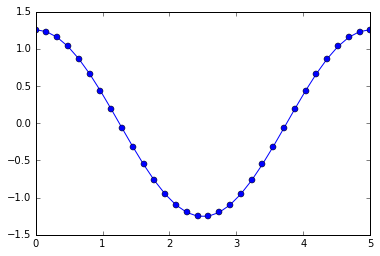

In [51]:
Nz = 32

Lz = np.float_(5.)

delta_z = Lz/(np.float_(Nz)-1.)
z_grid = np.arange((float(Nz)))

kk_cosine = np.arange((Nz))*np.pi/Lz

z_grid[0] = 0.
for k in arange(1,Nz):
        z_grid[k] = z_grid[k-1] + delta_z


u = np.zeros((Nz))
uz = np.zeros((Nz))
uzz = np.zeros((Nz))
u_exact = np.zeros((Nz))
uz_exact = np.zeros((Nz))
uzz_exact = np.zeros((Nz))

u = np.sin(z_grid*kk_cosine[2])
u_exact = np.copy(u)
uz_exact = kk_cosine[2]*np.cos(z_grid*kk_cosine[2])
uzz_exact = -np.sin(z_grid*kk_cosine[2])*kk_cosine[2]**2

#
# Just take the transform and go back
#

u_hat[1:Nz-1] = sci.fftpack.dst(u[1:Nz-1], type=1)/(np.float_(Nz)-1.)
u[1:Nz-1] = sci.fftpack.idst(u_hat[1:Nz-1], type=1)*.5
print 'there', u
print 'and back again', u_exact

fig_1D = plt.figure(1)
fig,ax = plt.subplots()
p1, = plt.plot(z_grid,u, 'b-')
p2, = plt.plot(z_grid,u_exact ,'bo')
plt.show(1)

#
# Now try to take 2 derivatives, since 1 will require a different inverse transform
#

u_hat[1:Nz-1] = sci.fftpack.dst(u_exact[1:Nz-1], type=1)/(np.float_(Nz)-1.)
uzz[1:Nz-1] = sci.fftpack.idst(-u_hat[1:Nz-1]*kk_cosine[1:Nz-1]*kk_cosine[1:Nz-1], type=1)*.5
print 'second derive', len(uzz), uzz
print 'second drive exact', len(uzz_exact), uzz_exact

fig_1D = plt.figure(2)
fig,ax = plt.subplots()
p1, = plt.plot(z_grid,uzz, 'b-')
p2, = plt.plot(z_grid,uzz_exact, 'bo')
plt.show(2)

#
# Now try to take 1 derivative - might as well use the u_hat above
#
uz = sci.fftpack.idct(u_hat*kk_cosine, type=1)*.5
print 'first derive', len(uz), uz
print 'first drive exact', len(uz_exact), uz_exact

fig_1D = plt.figure(3)
fig,ax = plt.subplots()
p1, = plt.plot(z_grid,uz, 'b-')
p2, = plt.plot(z_grid,uz_exact, 'bo')
plt.show(3)



Solve a few numerical problems to see how you do.  First, the heat equation.

$
\frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial t^2}
$

Fourier transform using kk_cosine as q,

$
\frac{d \widehat{u}_k}{dt} = -\nu q^2 \widehat{u}_k
$


In [93]:
def rk4(t, dt, u, params, f_of_u):
    """ This is a solver for RK4"""
    k1 = dt * f_of_u(t, params, u)
    k2 = dt * f_of_u(t + 0.5*dt, params, u + 0.5*k1)
    k3 = dt * f_of_u(t + 0.5*dt, params, u + 0.5*k2)
    k4 = dt * f_of_u(t + dt, params, u + k3)
    return t + dt, u + (k1 + 2.0*(k2 + k3) + k4)/6.0

def rhsHeat(t, params, state):
    """This is the right hand side for the heat equation."""
    # Unpack the parameters    
    nu, speed = params

    # Unpack the unknowns
    u = state[0]
    
    u_hat[1:Nz-1] = sci.fftpack.dst(u[1:Nz-1], type=1)/(np.float_(Nz)-1.)
    
    uzz[1:Nz-1] = sci.fftpack.idst(-u_hat[1:Nz-1]*kk_cosine[1:Nz-1]*kk_cosine[1:Nz-1], type=1)*.5    
    
    rHeat = nu*uzz
    
    return np.array([rHeat])

def u_Heat_exact(t, z_grid, Nz, Lz, kk_cosine, u0_hat, params):
    """ This function returns the spectral coefficients for the decay problem. """
    fac = np.zeros((Nz))
    nu, speed = params
    
    for i in range(1,Nz-1):
        if (kk_cosine[i] == 0):
            fac[i] = 0.
        else:
            fac[i] = u0_hat[i]*np.exp(-nu*kk_cosine[i]*kk_cosine[i]*t)
 
    return sci.fftpack.idst(fac[1:Nz-1], type=1)*.5

    

The time step is 0.0025
Snapshots will be saved at every interval of  0.25 seconds
  0.247500   0.905749   0.905749
  0.497500   0.820625   0.820625
  0.750000   0.742767   0.742767
  1.000000   0.672961   0.672961


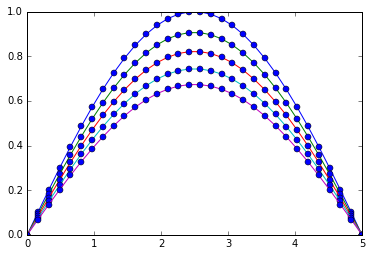

In [106]:

#
# Time integration parameters
#
EndTime = 1.
dt = 1./400.

print "The time step is", dt

nu = 1.0
speed = 0.

params = np.array([nu, speed])

#
# Plotting parameters
#

NSnapshots = 5  # The number of snapshots of the solution you want to see

TSnapshot = EndTime/np.float_(NSnapshots-1)
print "Snapshots will be saved at every interval of ", TSnapshot, "seconds"

time_array = np.zeros((NSnapshots))
u_plot_array = np.zeros((NSnapshots, Nz))

#
# Set the initial condtion
#

u = np.sin(z_grid*kk_cosine[1])
u0_hat = np.zeros((Nz))
u_exact = np.zeros((Nz))

state = np.array([u])

u0_hat[1:Nz-1] = sci.fftpack.dst(u[1:Nz-1], type=1)/(np.float_(Nz)-1.)

#
# Start the time integration
#

t = 0.
u_exact[1:Nz-1] = u_Heat_exact(t, z_grid, Nz, Lz, kk_cosine, u0_hat, params)

time_array[0] = t
u_plot_array[0,:] =  np.copy(u_exact)

iSnapshot = 1
while t < EndTime - dt:
    t,state = rk4(t, dt, state, params, rhsHeat)
    u = state[0]
    if np.abs(t-TSnapshot*iSnapshot) <= dt:
        time_array[iSnapshot] = t
        u_plot_array[iSnapshot,:] = u 
        iSnapshot += 1
#    print ('%10f %10f' % (t, max(u)))
        print '%10f %10f %10f' % (t, max(u), max(u_Heat_exact(t, z_grid, Nz, Lz, kk_cosine, u0_hat, params)))


fig_1D = plt.figure(4)
fig,ax = plt.subplots()
for i in range(NSnapshots):
    plt.plot(z_grid,u_plot_array[i])
    u_exact[1:Nz-1] = u_Heat_exact(time_array[i], z_grid, Nz, Lz, kk_cosine, u0_hat, params)
    plt.plot(z_grid,u_exact, 'bo')
plt.show(4)

    

Now look at advection

$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial z} = 0
$

Which in Fourier looks like where q is kk_cosine from this worksheet,

$
\frac{d \widehat{u}_k}{dt} + c q \widehat{u}_k = 0
$

Now, this is harder to see because there is no i! So the exact solution to this problem is not able to be seen with the exponential.

The solution that it has is from d'Alemberts theory which is,

$
u(x,t) = u(x - ct)
$


In [ ]:
def rhsAdv(t, params, state):
    """This is the right hand side for the heat equation."""
    # Unpack the parameters    
    nu, speed = params

    # Unpack the unknowns
    u = state[0]
    
    u_hat[1:Nz-1] = sci.fftpack.dst(u[1:Nz-1], type=1)/(np.float_(Nz)-1.)
    
    uzz[1:Nz-1] = sci.fftpack.idst(-u_hat[1:Nz-1]*kk_cosine[1:Nz-1]*kk_cosine[1:Nz-1], type=1)*.5    
    
    rHeat = nu*uzz
    
    return np.array([rHeat])

def u_Adv_exact(t, z_grid, Nz, Lz, kk_cosine, u0_hat, params):
    """ This function returns the spectral coefficients for the decay problem. """
    fac = np.zeros((Nz))
    nu, speed = params
    
    for i in range(1,Nz-1):
        if (kk_cosine[i] == 0):
            fac[i] = 0.
        else:
            fac[i] = u0_hat[i]*np.exp(-nu*kk_cosine[i]*kk_cosine[i]*t)
 
    return sci.fftpack.idst(fac[1:Nz-1], type=1)*.5



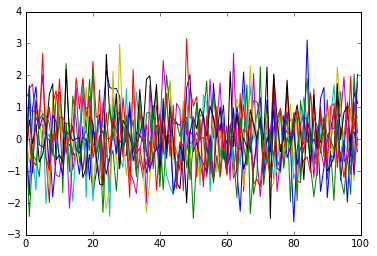

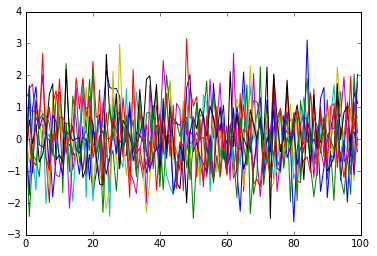

In [107]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)
    

ImportError: No module named pandas